In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 1.8 MB/s eta 0:00:00


In [7]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import numpy as np
import time
def get_graph(place_name):
    graph = ox.graph_from_place(place_name, network_type='drive')
    return graph
# Function to find the nearest node in the graph to a given point
def get_nearest_node(graph, point):
    return ox.distance.nearest_nodes(graph, point[1], point[0])
def navigate(graph, start_point, end_point):
    start_node = ox.distance.nearest_nodes(graph, start_point[1], start_point[0])
    end_node = ox.distance.nearest_nodes(graph, end_point[1], end_point[0])
    route = nx.shortest_path(graph, start_node, end_node, weight='length')
    return route

# Function to print path info
def print_path_info(graph, path):
    total_distance = 0
    for i in range(len(path) - 1):
        edge_data = graph.get_edge_data(path[i], path[i + 1], 0)
        street_name = edge_data.get('name', 'Unnamed street')
        length = edge_data.get('length', 0)
        total_distance += length
        print(f"Edge from '{street_name}': Length = {length:.2f} meters")
    print(f"Total Distance: {total_distance:.2f} meters\n")

# List of locations with corrected coordinate order (latitude, longitude)
locations = {
        'Lotus Land Tours': (49.27306, -123.1252),
    'Harbour Cruises': (49.29351, -123.1339),
    'Playland Amusement Park': (49.28278, -123.0373),
    'VanDusen Botanical Garden': (49.23903, -123.1346),
    'Vancouver Maritime Museum': (49.27752, -123.1474),
    'Granville Island': (49.27211, -123.1358),
    'PNE - Pacific National Exhibition': (49.28066, -123.0413),
    'Bloedel Conservatory': (49.24337, -123.1173),
    'Arts Club Theatre Company': (49.26134, -123.1385),
    'CHI, the Spa at Shangri-la': (49.28587, -123.124),
    'Douglas Reynolds Gallery': (49.26485, -123.1387),
    'The Comedy Department': (49.28695, -123.1407)
}



Path from Lotus Land Tours to Harbour Cruises:
Edge from 'Pacific Street': Length = 135.48 meters
Edge from 'Pacific Street': Length = 94.85 meters
Edge from 'Pacific Street': Length = 204.93 meters
Edge from 'Pacific Street': Length = 47.77 meters
Edge from 'Pacific Street': Length = 55.79 meters
Edge from 'Pacific Street': Length = 103.36 meters
Edge from 'Pacific Street': Length = 204.26 meters
Edge from 'Pacific Street': Length = 220.37 meters
Edge from 'Pacific Street': Length = 161.43 meters
Edge from 'Beach Avenue': Length = 139.69 meters
Edge from 'Beach Avenue': Length = 123.58 meters
Edge from 'Beach Avenue': Length = 116.81 meters
Edge from 'Beach Avenue': Length = 181.97 meters
Edge from 'Beach Avenue': Length = 179.28 meters
Edge from 'Beach Avenue': Length = 43.35 meters
Edge from '['Beach Avenue', 'Denman Street']': Length = 75.13 meters
Edge from 'Denman Street': Length = 8.44 meters
Edge from 'Denman Street': Length = 49.64 meters
Edge from 'Denman Street': Length = 60

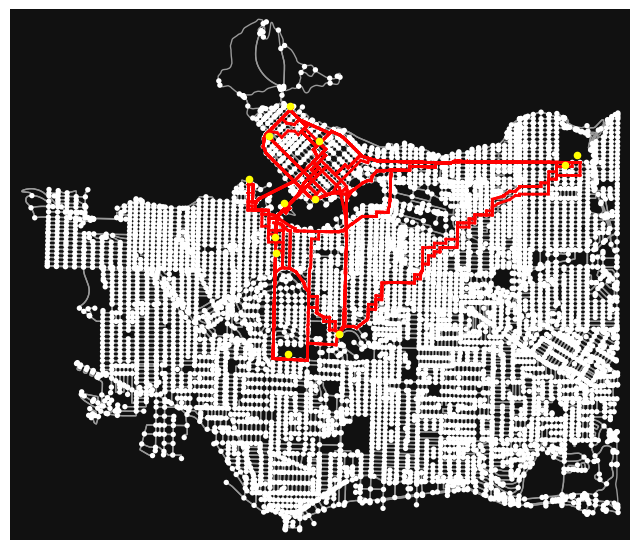

In [4]:
  place_name = "Vancouver, Canada"
graph = get_graph(place_name)

# Prepare the figure
fig, ax = ox.plot_graph(graph, show=False, close=False)

# Plot each path and print info
for (start_name, start_coords), (end_name, end_coords) in itertools.combinations(locations.items(), 2):
    path = navigate(graph, start_coords, end_coords)
    for i in range(len(path) - 1):
        point1 = graph.nodes[path[i]]
        point2 = graph.nodes[path[i + 1]]
        line = [[point1['x'], point2['x']], [point1['y'], point2['y']]]
        ax.plot(line[0], line[1], color='red', linewidth=2)

    print(f"Path from {start_name} to {end_name}:")
    print_path_info(graph, path)

# Add markers for each location
for place, coords in locations.items():
    ax.scatter(coords[1], coords[0], c='yellow', s=20,zorder=3)  # Adjusted size and color

plt.show()

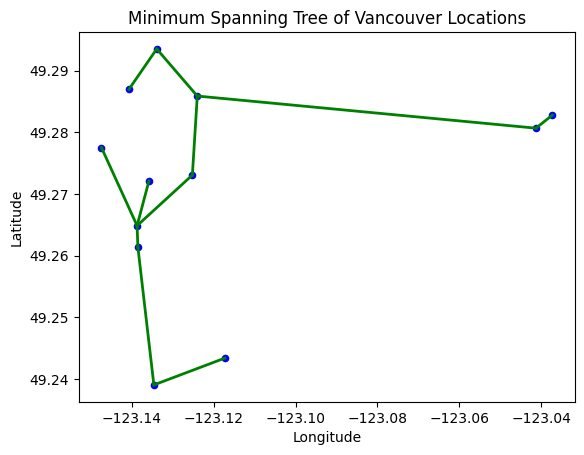

In [4]:

place_name = "Vancouver, Canada"
graph = get_graph(place_name)

# Create a weighted graph for MST
mst_graph = nx.Graph()

# Compute shortest paths and add edges to the graph
for (start_name, start_coords), (end_name, end_coords) in itertools.combinations(locations.items(), 2):
    path = navigate(graph, start_coords, end_coords)

    # Calculate the total length of the path
    path_length = 0
    for i in range(len(path) - 1):
        edge_data = graph.get_edge_data(path[i], path[i + 1])
        path_length += edge_data[0]['length']

    mst_graph.add_edge(start_name, end_name, weight=path_length)

# Apply MST algorithm
mst = nx.minimum_spanning_tree(mst_graph, weight='weight')

# Visualize the MST
fig, ax = plt.subplots()
for (u, v, d) in mst.edges(data=True):
    u_coords = locations[u]
    v_coords = locations[v]
    ax.plot([u_coords[1], v_coords[1]], [u_coords[0], v_coords[0]], color='green', linewidth=2)

# Add markers for each location
for place, coords in locations.items():
    ax.scatter(coords[1], coords[0], c='blue', s=20)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Minimum Spanning Tree of Vancouver Locations')
plt.show()